In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

https://www.kaggle.com/datasets/rishikeshkonapure/home-loan-approval

In [2]:
df = pd.read_csv('loan_sanction_train.csv')


In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Deal with null values

In [4]:
df.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [5]:
print('Gender', len(df[df['Gender'].isna()]))
print('Married', len(df[df['Married'].isna()]))
print('Dependents', len(df[df['Dependents'].isna()]))
print('Self_Employed', len(df[df['Self_Employed'].isna()]))
print('LoanAmount', len(df[df['LoanAmount'].isna()]))
print('Loan_Amount_Term', len(df[df['Loan_Amount_Term'].isna()]))
print('Credit_History', len(df[df['Credit_History'].isna()]))

print('total unique rows with missing values =', len(df[df.isnull().any(axis=1)]))

Gender 13
Married 3
Dependents 15
Self_Employed 32
LoanAmount 22
Loan_Amount_Term 14
Credit_History 50
total unique rows with missing values = 134


In [6]:
df['Gender'] = df['Gender'].fillna('Unknown')
df['Married'] = df['Married'].fillna('Unknown')
df['Dependents'] = df['Dependents'].fillna('Unknown')
df['Self_Employed'] = df['Self_Employed'].fillna('Unknown')
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(-1)
df['Credit_History'] = df['Credit_History'].fillna(-1)


In [7]:
print('Gender', len(df[df['Gender'].isna()]))
print('Married', len(df[df['Married'].isna()]))
print('Dependents', len(df[df['Dependents'].isna()]))
print('Self_Employed', len(df[df['Self_Employed'].isna()]))
print('LoanAmount', len(df[df['LoanAmount'].isna()]))
print('Loan_Amount_Term', len(df[df['Loan_Amount_Term'].isna()]))
print('Credit_History', len(df[df['Credit_History'].isna()]))

print('total unique rows with missing values =', len(df[df.isnull().any(axis=1)]))

Gender 0
Married 0
Dependents 0
Self_Employed 0
LoanAmount 22
Loan_Amount_Term 0
Credit_History 0
total unique rows with missing values = 22


In [8]:
# drop continous missing values

df = df.dropna(subset=['LoanAmount'])

In [9]:
print('Gender', len(df[df['Gender'].isna()]))
print('Married', len(df[df['Married'].isna()]))
print('Dependents', len(df[df['Dependents'].isna()]))
print('Self_Employed', len(df[df['Self_Employed'].isna()]))
print('LoanAmount', len(df[df['LoanAmount'].isna()]))
print('Loan_Amount_Term', len(df[df['Loan_Amount_Term'].isna()]))
print('Credit_History', len(df[df['Credit_History'].isna()]))

print('total unique rows with missing values =', len(df[df.isnull().any(axis=1)]))
print('total rows = ', len(df))

Gender 0
Married 0
Dependents 0
Self_Employed 0
LoanAmount 0
Loan_Amount_Term 0
Credit_History 0
total unique rows with missing values = 0
total rows =  592


In [10]:
# df = df.dropna(subset=['Dependents', 'LoanAmount', 'Loan_Amount_Term'])

In [11]:
# print('Gender', len(df[df['Gender'].isna()]))
# print('Married', len(df[df['Married'].isna()]))
# print('Dependents', len(df[df['Dependents'].isna()]))
# print('Self_Employed', len(df[df['Self_Employed'].isna()]))
# print('LoanAmount', len(df[df['LoanAmount'].isna()]))
# print('Loan_Amount_Term', len(df[df['Loan_Amount_Term'].isna()]))
# print('Credit_History', len(df[df['Credit_History'].isna()]))

# print('total unique rows with missing values =', len(df[df.isnull().any(axis=1)]))

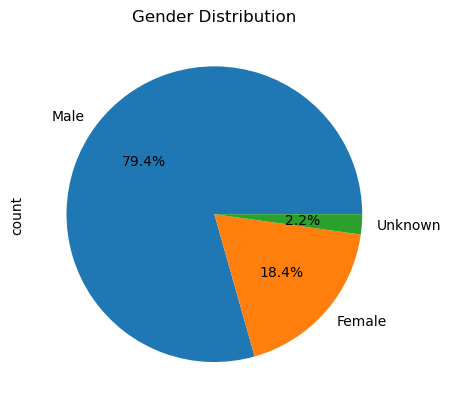

In [12]:
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

<Axes: >

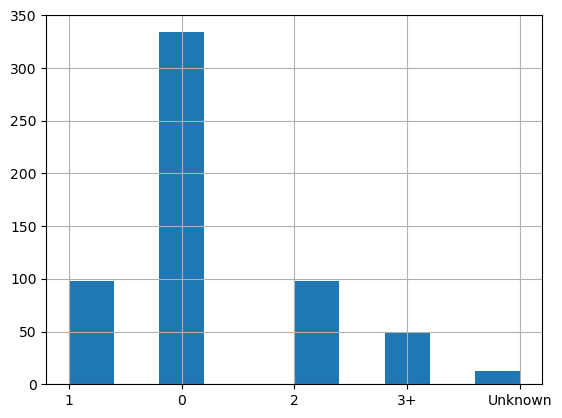

In [13]:
df['Dependents'].hist()

<Axes: >

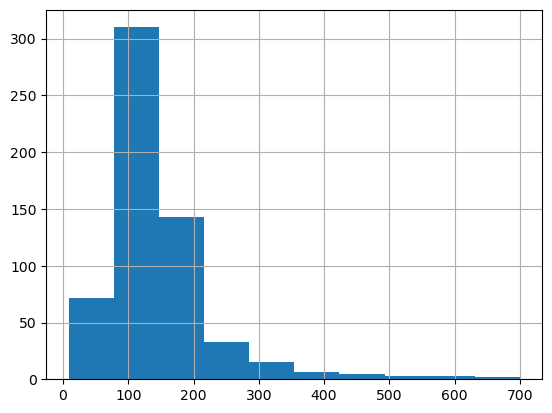

In [14]:
df['LoanAmount'].hist()

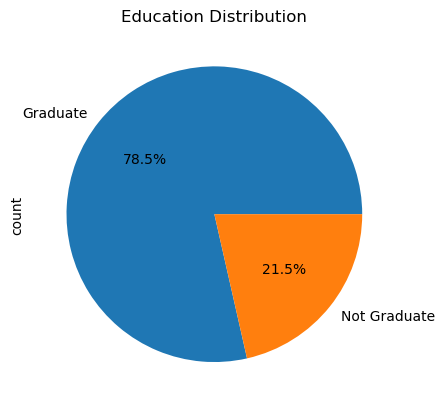

In [15]:
df['Education'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Education Distribution')
plt.show()

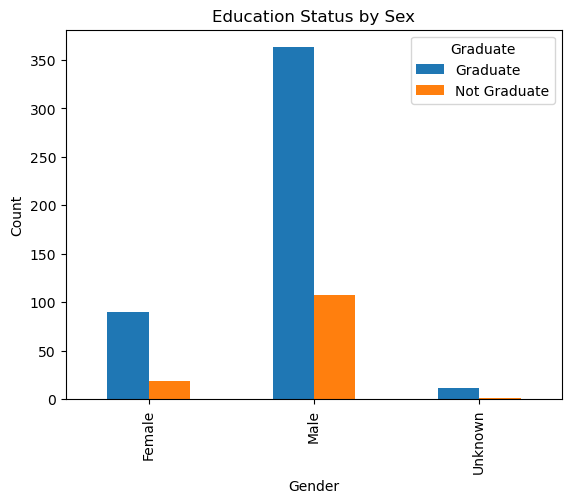

In [16]:
pd.crosstab(df['Gender'], df['Education']).plot(kind='bar')
plt.title('Education Status by Sex')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Graduate')
plt.show()

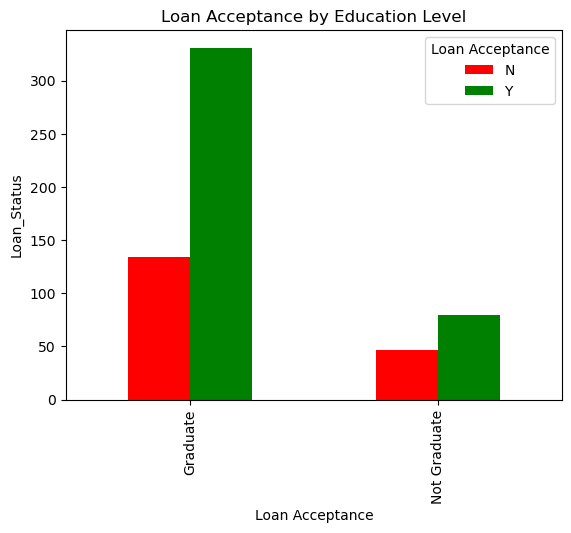

In [17]:
pd.crosstab(df['Education'], df['Loan_Status']).plot(kind='bar', color=['red', 'green'] )
plt.title('Loan Acceptance by Education Level')
plt.xlabel('Loan Acceptance')
plt.ylabel('Loan_Status')
plt.legend(title='Loan Acceptance')
plt.show()

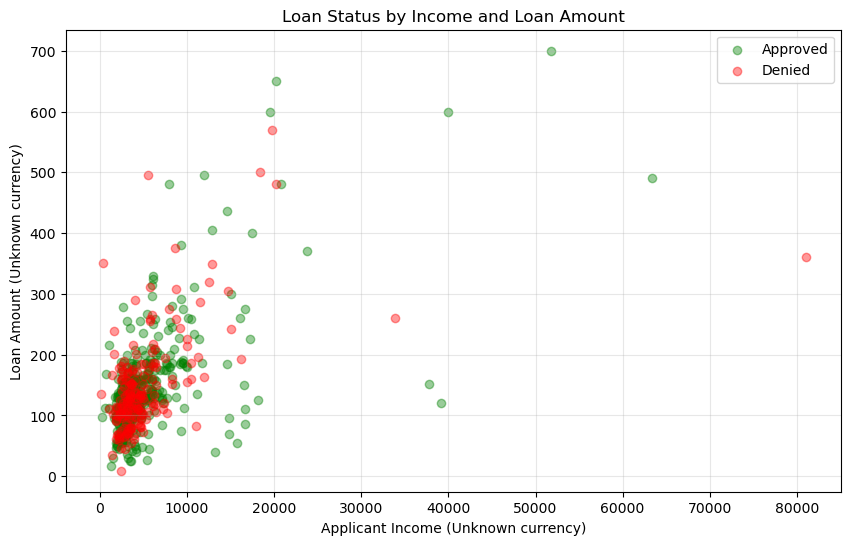

In [18]:
plt.figure(figsize=(10, 6))

# Plot approved loans
approved = df[df['Loan_Status'] == 'Y']
plt.scatter(approved['ApplicantIncome'], approved['LoanAmount'], 
           label='Approved', alpha=0.4, color='green')

# Plot denied loans
denied = df[df['Loan_Status'] == 'N']
plt.scatter(denied['ApplicantIncome'], denied['LoanAmount'], 
           label='Denied', alpha=0.4, color='red')

plt.title('Loan Status by Income and Loan Amount')
plt.xlabel('Applicant Income (Unknown currency)')
plt.ylabel('Loan Amount (Unknown currency)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


<Figure size 640x480 with 0 Axes>

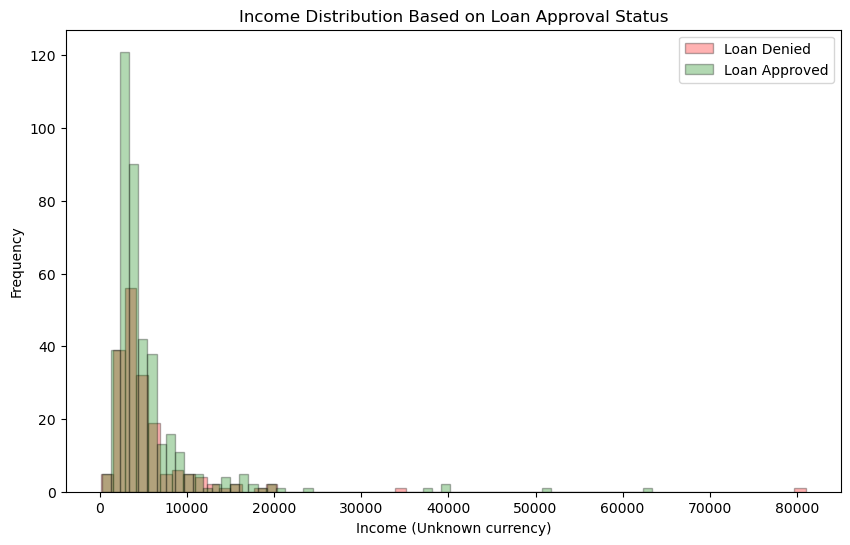

In [19]:
denied_loan_income = df[df['Loan_Status'] == 'N']['ApplicantIncome']
approved_loan_income = df[df['Loan_Status'] == 'Y']['ApplicantIncome']


plt.clf()
plt.figure(figsize=(10, 6))
plt.hist(denied_loan_income, bins=60, alpha=0.3, color='red', edgecolor='black')
plt.hist(approved_loan_income, bins=60, alpha=0.3, color='green', edgecolor='black')
plt.legend(['Loan Denied', 'Loan Approved'])
plt.title('Income Distribution Based on Loan Approval Status')
plt.xlabel('Income (Unknown currency)')
plt.ylabel('Frequency')
plt.show()

<Figure size 640x480 with 0 Axes>

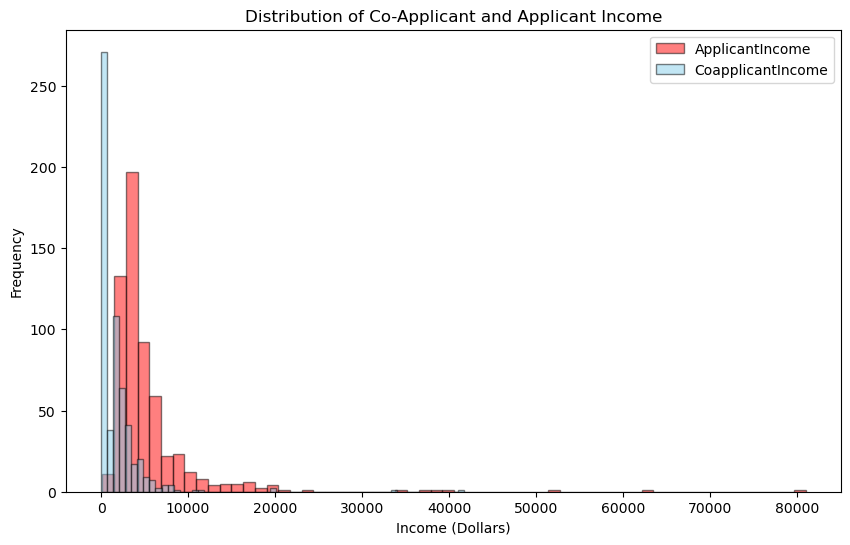

In [20]:
plt.clf()
plt.figure(figsize=(10, 6))
plt.hist(df['ApplicantIncome'], bins=60, alpha=0.5, color='red', edgecolor='black')
plt.hist(df['CoapplicantIncome'], bins=60, alpha=0.5, color='skyblue', edgecolor='black')
plt.legend(['ApplicantIncome', 'CoapplicantIncome'])
plt.title('Distribution of Co-Applicant and Applicant Income')
plt.xlabel('Income (Dollars)')
plt.ylabel('Frequency')
plt.show()

<Axes: >

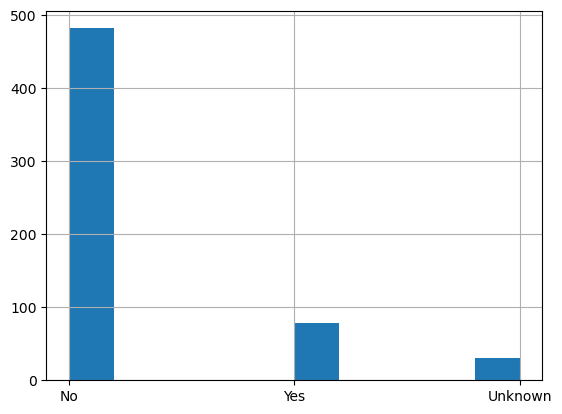

In [21]:
df['Self_Employed'].hist()

# Splitting

In [22]:
from sklearn.model_selection import train_test_split 

y = df[['Loan_Status']]
X = df.loc[:, df.columns!='Loan_Status']
print(X.shape)
print(y.shape)

(592, 12)
(592, 1)


In [23]:
random_state = 42

# first split to separate out the training set
X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,random_state = random_state)
print('training set:',X_train.shape, y_train.shape) # 60% of points are in train
print(X_other.shape, y_other.shape) # 40% of points are in other

# second split to separate out the validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,random_state = random_state)
print('validation set:',X_val.shape, y_val.shape) # 20% of points are in validation
print('test set:',X_test.shape, y_test.shape) # 20% of points are in test

training set: (355, 12) (355, 1)
(237, 12) (237, 1)
validation set: (118, 12) (118, 1)
test set: (119, 12) (119, 1)


# Preprocessing

In [24]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']

ordinal_columns = ['Dependents', 'Loan_Amount_Term']
cats = [['Unknown', '0', '1', '2', '3+'], [-1, 12.,  36.,  60.,  84., 120., 180., 240., 300., 360., 480.]]

continuous_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

y_categorical_columns = ['Loan_Status']

In [26]:
# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = cats), ordinal_columns),
        ('onehot', OneHotEncoder(sparse_output=False), categorical_columns),
        ('std', StandardScaler(), continuous_columns)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

preprocessor.get_feature_names_out()

array(['ord__Dependents', 'ord__Loan_Amount_Term',
       'onehot__Gender_Female', 'onehot__Gender_Male',
       'onehot__Gender_Unknown', 'onehot__Married_No',
       'onehot__Married_Unknown', 'onehot__Married_Yes',
       'onehot__Education_Graduate', 'onehot__Education_Not Graduate',
       'onehot__Self_Employed_No', 'onehot__Self_Employed_Unknown',
       'onehot__Self_Employed_Yes', 'onehot__Credit_History_-1.0',
       'onehot__Credit_History_0.0', 'onehot__Credit_History_1.0',
       'onehot__Property_Area_Rural', 'onehot__Property_Area_Semiurban',
       'onehot__Property_Area_Urban', 'std__ApplicantIncome',
       'std__CoapplicantIncome', 'std__LoanAmount'], dtype=object)

In [27]:
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), y_categorical_columns)
#     ]
# )

# clf = Pipeline(steps=[('preprocessor', preprocessor)])

# y_train_prep = clf.fit_transform(y_train)
# y_val_prep = clf.transform(y_val)
# y_test_prep = clf.transform(y_test)

# preprocessor.get_feature_names_out()


In [28]:
y_train_prep = y_train['Loan_Status'].map({'Y': 1, 'N': 0})
y_val_prep = y_val['Loan_Status'].map({'Y': 1, 'N': 0})
y_test_prep = y_test['Loan_Status'].map({'Y': 1, 'N': 0})

In [29]:
y_train

,Loan_Status
314,N
350,Y
454,Y
183,N
32,N
...,...
74,Y
114,Y
280,N
452,N


In [30]:
y_train_prep

314    0
350    1
454    1
183    0
32     0
      ..
74     1
114    1
280    0
452    0
109    1
Name: Loan_Status, Length: 355, dtype: int64

# Train models

In [31]:
df['Loan_Status'].value_counts()

Loan_Status
Y    411
N    181
Name: count, dtype: int64

In [32]:
from sklearn.metrics import accuracy_score, classification_report

# baseline - predict 1 (yes) for all
preds = np.array([1] * len(X_val_prep))

accuracy = accuracy_score(y_val_prep, preds)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_val_prep, preds))

Accuracy: 0.67
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.67      1.00      0.80        79

    accuracy                           0.67       118
   macro avg       0.33      0.50      0.40       118
weighted avg       0.45      0.67      0.54       118



/Users/aparekh675/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/aparekh675/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/aparekh675/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [33]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)

logreg.fit(X_train_prep, y_train_prep)

# predict on validation set
y_val_pred = logreg.predict(X_val_prep)
y_val_proba = logreg.predict_proba(X_val_prep)

# calculate accuracy
accuracy = accuracy_score(y_val_prep, y_val_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_val_prep, y_val_pred))

Accuracy: 0.82
              precision    recall  f1-score   support

           0       1.00      0.46      0.63        39
           1       0.79      1.00      0.88        79

    accuracy                           0.82       118
   macro avg       0.90      0.73      0.76       118
weighted avg       0.86      0.82      0.80       118



In [34]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)

rf_model.fit(X_train_prep, y_train_prep)

# make predictions on validation set
y_val_pred = rf_model.predict(X_val_prep)
y_val_proba = rf_model.predict_proba(X_val_prep)

# Calculate accuracy
accuracy = accuracy_score(y_val_prep, y_val_pred)
print(f"Accuracy: {accuracy:.2f}")

# Get detailed metrics
print(classification_report(y_val_prep, y_val_pred))

Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.86      0.46      0.60        39
           1       0.78      0.96      0.86        79

    accuracy                           0.80       118
   macro avg       0.82      0.71      0.73       118
weighted avg       0.81      0.80      0.78       118



In [35]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='rbf', random_state=42)

# Train the model
svm_model.fit(X_train_prep, y_train_prep)

# Make predictions
y_val_pred = svm_model.predict(X_val_prep)

# Calculate accuracy
accuracy = accuracy_score(y_val_prep, y_val_pred)
print(f"Accuracy: {accuracy:.2f}")

# Get detailed metrics
print(classification_report(y_val_prep, y_val_pred))

Accuracy: 0.82
              precision    recall  f1-score   support

           0       1.00      0.46      0.63        39
           1       0.79      1.00      0.88        79

    accuracy                           0.82       118
   macro avg       0.90      0.73      0.76       118
weighted avg       0.86      0.82      0.80       118



In [36]:
from xgboost import XGBClassifier

# Initialize the model
model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    tree_method='hist'
)

# Train the model
model.fit(X_train_prep, y_train_prep)

# Make predictions
y_val_pred = model.predict(X_val_prep)
y_val_proba = model.predict_proba(X_val_prep)

print(f"Accuracy: {accuracy_score(y_val_prep, y_val_pred):.2f}")
print(classification_report(y_val_prep, y_val_pred))


Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.85      0.44      0.58        39
           1       0.78      0.96      0.86        79

    accuracy                           0.79       118
   macro avg       0.81      0.70      0.72       118
weighted avg       0.80      0.79      0.77       118



# Hyperparam tuning and random state variance

In [72]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score, classification_report, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from xgboost import XGBClassifier




categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']

ordinal_columns = ['Dependents', 'Loan_Amount_Term']
cats = [['Unknown', '0', '1', '2', '3+'], [-1, 12.,  36.,  60.,  84., 120., 180., 240., 300., 360., 480.]]

continuous_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = cats), ordinal_columns),
        ('onehot', OneHotEncoder(sparse_output=False), categorical_columns),
        ('std', StandardScaler(), continuous_columns)])

random_states = [42, 1, 99, 209, 933]

baseline_prec = []

logistic_regression_models = []
logistic_regression_prec = []

random_forest_classifier_models = []
random_forest_classifier_prec = []

svc_models = []
svc_prec = []

xgbclassifier_models = []
xgbclassifier_prec = []

test_sets = []
val_sets = []
train_sets = []

for random_state in random_states:
    # first split to separate out the training set
    X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,random_state = random_state)
    print('training set:',X_train.shape, y_train.shape) # 60% of points are in train
    print(X_other.shape, y_other.shape) # 40% of points are in other

    # second split to separate out the validation and test sets
    X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,random_state = random_state)
    print('validation set:',X_val.shape, y_val.shape) # 20% of points are in validation
    print('test set:',X_test.shape, y_test.shape) # 20% of points are in test

    clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 

    X_train_prep = clf.fit_transform(X_train)
    X_val_prep = clf.transform(X_val)
    X_test_prep = clf.transform(X_test)

    y_train_prep = y_train['Loan_Status'].map({'Y': 1, 'N': 0})
    y_val_prep = y_val['Loan_Status'].map({'Y': 1, 'N': 0})
    y_test_prep = y_test['Loan_Status'].map({'Y': 1, 'N': 0})

    test_sets.append({'X_test_prep':X_test_prep, 'y_test_prep':y_test_prep})
    val_sets.append({'X_val_prep':X_val_prep, 'y_val_prep':y_val_prep})
    train_sets.append({'X_train_prep':X_train_prep, 'y_train_prep':y_train_prep})

    # baseline testing
    # baseline - predict 1 (yes) for all
    print("Baseline:")

    baseline_preds = np.array([1] * len(X_val_prep))

    baseline_precision = precision_score(y_val_prep, baseline_preds)
    # print(f"precision: {baseline_precision:.2f}")

    # print(classification_report(y_val_prep, baseline_preds))

    baseline_prec.append(baseline_precision)


    # logistic regression -----------
    print("Logistic Regression")

    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga'],
        'class_weight': [None, 'balanced'],
        'max_iter': [3000]
    }

    # Initialize model
    logreg = LogisticRegression(random_state=random_state)

    # Setup GridSearchCV
    grid_search = GridSearchCV(
        estimator=logreg,
        param_grid=param_grid,
        cv=5,
        scoring='precision',
        n_jobs=-1,
        verbose=1
    )

    # Fit the grid search
    grid_search.fit(X_train_prep, y_train_prep)

    # Print best parameters and score
    # print("Best parameters:", grid_search.best_params_)
    # print("Best cross-validation score:", grid_search.best_score_)

    # Use best model to predict
    best_model = grid_search.best_estimator_
    y_val_pred = best_model.predict(X_val_prep)

    # Evaluate performance
    # print("\nValidation Set Performance:")
    # print(f"precision: {precision_score(y_val_prep, y_val_pred):.2f}")
    # print("\nClassification Report:")
    # print(classification_report(y_val_prep, y_val_pred))

    logistic_regression_models.append(best_model)
    logistic_regression_prec.append(precision_score(y_val_prep, y_val_pred))


    # random forest classifier ---------
    print("Random Forest Classifier:")
    # Define parameter grid
    param_grid = {
        'n_estimators': [100, 500, 1000],
        'max_depth': [None, 10, 20, 30],
        # 'min_samples_split': [2, 5, 10],
        # 'min_samples_leaf': [1, 2, 4],
        # 'max_features': ['sqrt', 'log2']
    }

    # Initialize the model
    rf = RandomForestClassifier(random_state=random_state)

    # Setup GridSearchCV
    grid_search = GridSearchCV(
        estimator=rf,
        param_grid=param_grid,
        cv=5,
        scoring='precision',
        n_jobs=-1,  # Use all available cores
        verbose=1
    )

    # Fit the grid search
    grid_search.fit(X_train_prep, y_train_prep)

    # Print best parameters and score
    # print("Best parameters:", grid_search.best_params_)
    # print("Best cross-validation score:", grid_search.best_score_)

    # Get best model
    best_rf = grid_search.best_estimator_

    # Make predictions on validation set
    y_val_pred = best_rf.predict(X_val_prep)
    y_val_proba = best_rf.predict_proba(X_val_prep)

    # Calculate precision
    precision = precision_score(y_val_prep, y_val_pred)
    # print(f"\nValidation precision: {precision:.2f}")

    # # Get detailed metrics
    # print("\nClassification Report:")
    # print(classification_report(y_val_prep, y_val_pred))

    random_forest_classifier_models.append(best_rf)
    random_forest_classifier_prec.append(precision)

    
    # SVC --------------
    print("SVC:")
    # Define parameter grid
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['rbf', 'linear'],
        'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
        # 'class_weight': [None, 'balanced']
    }

    # Initialize the model
    svm = SVC(random_state=random_state)

    # Setup GridSearchCV
    grid_search = GridSearchCV(
        estimator=svm,
        param_grid=param_grid,
        cv=5,
        scoring='precision',
        n_jobs=-1,  # Use all available cores
        verbose=1
    )

    # Fit the grid search
    grid_search.fit(X_train_prep, y_train_prep)

    # Print best parameters and score
    # print("Best parameters:", grid_search.best_params_)
    # print("Best cross-validation score:", grid_search.best_score_)

    # Get best model
    best_svm = grid_search.best_estimator_

    # Make predictions on validation set
    y_val_pred = best_svm.predict(X_val_prep)

    # Calculate accuracy
    precision = precision_score(y_val_prep, y_val_pred)
    # print(f"\nValidation precision: {precision:.2f}")

    # Get detailed metrics
    # print("\nClassification Report:")
    # print(classification_report(y_val_prep, y_val_pred))

    svc_models.append(best_svm)
    svc_prec.append(precision)


    # XGBClassifier ------------
    print("XGBClassifier")
    # Define parameter grid
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 4, 5, 6],
        'learning_rate': [0.01, 0.1, 0.3],
        # 'subsample': [0.8, 0.9, 1.0],
        # 'colsample_bytree': [0.8, 0.9, 1.0],
        # 'min_child_weight': [1, 3, 5]
    }

    # Initialize the model
    xgb = XGBClassifier(
        tree_method='hist',
        random_state=random_state
    )

    # Setup GridSearchCV
    grid_search = GridSearchCV(
        estimator=xgb,
        param_grid=param_grid,
        cv=5,
        scoring='precision',
        n_jobs=-1,
        verbose=1
    )

    # Fit the grid search
    grid_search.fit(X_train_prep, y_train_prep)

    # Print best parameters and score
    # print("Best parameters:", grid_search.best_params_)
    # print("Best cross-validation score:", grid_search.best_score_)

    # Get best model
    best_xgb = grid_search.best_estimator_

    # Make predictions on validation set
    y_val_pred = best_xgb.predict(X_val_prep)
    y_val_proba = best_xgb.predict_proba(X_val_prep)

    # Calculate precision
    precision = precision_score(y_val_prep, y_val_pred)
    # print(f"\nValidation precision: {precision:.2f}")

    # # Get detailed metrics
    # print("\nClassification Report:")
    # print(classification_report(y_val_prep, y_val_pred))

    xgbclassifier_models.append(best_xgb)
    xgbclassifier_prec.append(precision)


training set: (355, 12) (355, 1)
(237, 12) (237, 1)
validation set: (118, 12) (118, 1)
test set: (119, 12) (119, 1)
Baseline:
Logistic Regression
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/Users/aparekh675/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/aparekh675/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/aparekh675/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

Random Forest Classifier:
Fitting 5 folds for each of 12 candidates, totalling 60 fits
SVC:
Fitting 5 folds for each of 40 candidates, totalling 200 fits
XGBClassifier
Fitting 5 folds for each of 36 candidates, totalling 180 fits
training set: (355, 12) (355, 1)
(237, 12) (237, 1)
validation set: (118, 12) (118, 1)
test set: (119, 12) (119, 1)
Baseline:
Logistic Regression
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/Users/aparekh675/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/aparekh675/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/aparekh675/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

Random Forest Classifier:
Fitting 5 folds for each of 12 candidates, totalling 60 fits
SVC:
Fitting 5 folds for each of 40 candidates, totalling 200 fits
XGBClassifier
Fitting 5 folds for each of 36 candidates, totalling 180 fits
training set: (355, 12) (355, 1)
(237, 12) (237, 1)
validation set: (118, 12) (118, 1)
test set: (119, 12) (119, 1)
Baseline:
Logistic Regression
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/Users/aparekh675/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/aparekh675/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/aparekh675/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

Random Forest Classifier:
Fitting 5 folds for each of 12 candidates, totalling 60 fits
SVC:
Fitting 5 folds for each of 40 candidates, totalling 200 fits
XGBClassifier
Fitting 5 folds for each of 36 candidates, totalling 180 fits
training set: (355, 12) (355, 1)
(237, 12) (237, 1)
validation set: (118, 12) (118, 1)
test set: (119, 12) (119, 1)
Baseline:
Logistic Regression
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/Users/aparekh675/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/aparekh675/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/aparekh675/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

Random Forest Classifier:
Fitting 5 folds for each of 12 candidates, totalling 60 fits
SVC:
Fitting 5 folds for each of 40 candidates, totalling 200 fits
XGBClassifier
Fitting 5 folds for each of 36 candidates, totalling 180 fits
training set: (355, 12) (355, 1)
(237, 12) (237, 1)
validation set: (118, 12) (118, 1)
test set: (119, 12) (119, 1)
Baseline:
Logistic Regression
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/Users/aparekh675/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/aparekh675/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/aparekh675/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

Random Forest Classifier:
Fitting 5 folds for each of 12 candidates, totalling 60 fits
SVC:
Fitting 5 folds for each of 40 candidates, totalling 200 fits
XGBClassifier
Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [73]:
print("precisions across random states:")

print("baselines:", baseline_prec)
print("baseline overall precision:", np.mean(baseline_prec))

print("logistic_regression:", logistic_regression_prec)
print("logistic_regression overall precision:", np.mean(logistic_regression_prec))

print("random_forest_classifier:", random_forest_classifier_prec)
print("random_forest_classifier overall precision:", np.mean(random_forest_classifier_prec))

print("svc ", svc_prec)
print("svc overall precision:", np.mean(svc_prec))

print("xgbclassifier", xgbclassifier_prec)
print("xgbclassifier overall precision:", np.mean(xgbclassifier_prec))

precisions across random states:
baselines: [0.6694915254237288, 0.652542372881356, 0.6610169491525424, 0.7372881355932204, 0.711864406779661]
baseline overall precision: 0.6864406779661018
logistic_regression: [0.7954545454545454, 0.7692307692307693, 0.7391304347826086, 0.8658536585365854, 0.8089887640449438]
logistic_regression overall precision: 0.7957316344098905
random_forest_classifier: [0.78125, 0.782608695652174, 0.7254901960784313, 0.8080808080808081, 0.8315789473684211]
random_forest_classifier overall precision: 0.7858017294359668
svc  [0.7912087912087912, 0.7666666666666667, 0.7289719626168224, 0.819047619047619, 0.8020833333333334]
svc overall precision: 0.7815956745746466
xgbclassifier [0.7684210526315789, 0.8117647058823529, 0.7311827956989247, 0.8210526315789474, 0.8]
xgbclassifier overall precision: 0.7864842371583608


In [74]:
# best model is logistic_regression @ index 3
# calculate baseline for test set for chosen model

X_test = test_sets[3]['X_test_prep']
y_test = test_sets[3]['y_test_prep']

baseline_preds = np.array([1] * len(X_test))
baseline_precision = precision_score(y_test, baseline_preds)

# calculate scores for best log reg model
best_model = logistic_regression_models[3]

y_test_preds = best_model.predict(X_test)
model_precision = precision_score(y_test, y_test_preds)

print("Baseline precision:", baseline_precision)

print(classification_report(y_test, baseline_preds))

print("Logistic regression precision:", model_precision)

print(classification_report(y_test, y_test_preds))



Baseline precision: 0.7226890756302521
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.72      1.00      0.84        86

    accuracy                           0.72       119
   macro avg       0.36      0.50      0.42       119
weighted avg       0.52      0.72      0.61       119

Logistic regression precision: 0.8068181818181818
              precision    recall  f1-score   support

           0       0.52      0.48      0.50        33
           1       0.81      0.83      0.82        86

    accuracy                           0.73       119
   macro avg       0.66      0.66      0.66       119
weighted avg       0.73      0.73      0.73       119



/Users/aparekh675/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/aparekh675/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/aparekh675/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

## Global feature importance using permutation_importance

In [75]:
from sklearn.inspection import permutation_importance

result = permutation_importance(best_model, X_test, y_test, n_repeats=5, random_state=42)

In [76]:
feature_names = clf.get_feature_names_out()

feature_importance = pd.DataFrame(
    {'feature': feature_names,
     'importance': result.importances_mean,
     'std': result.importances_std}
).sort_values('importance', ascending=False).head(10)

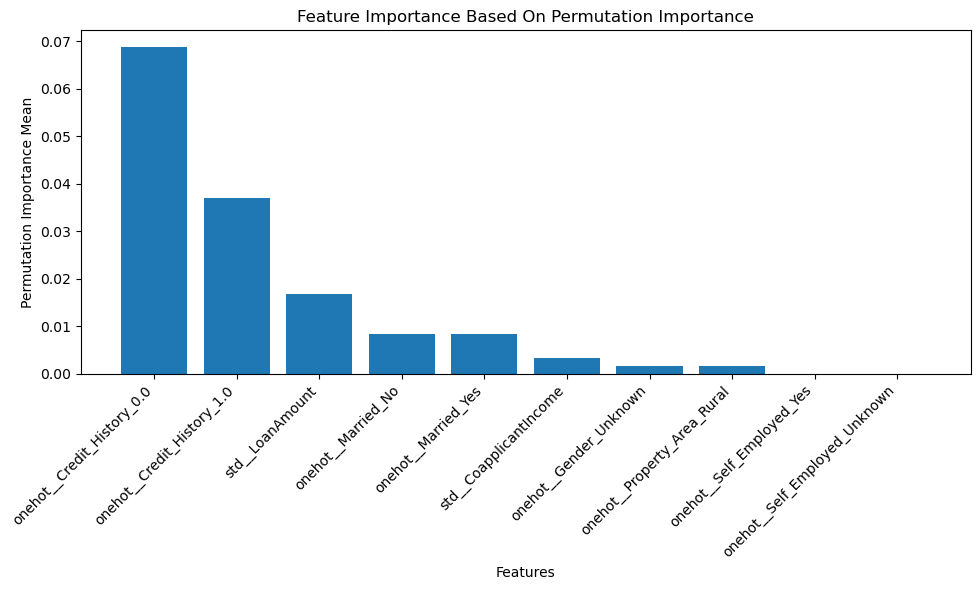

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=45, ha='right')
plt.title("Feature Importance Based On Permutation Importance")
plt.xlabel('Features')
plt.ylabel('Permutation Importance Mean')
plt.tight_layout()
plt.show()

## Global feature importance using size of coefficients 

In [78]:
coefficients = best_model.coef_[0]
print(len(coefficients))
print(coefficients)

22
[ 0.00302444  0.01259542  0.00029356  0.00195895 -0.00225958 -0.00243944
  0.00036827  0.00206411  0.00606309 -0.00607015 -0.00185278  0.00171176
  0.00013396  0.00259694 -0.03705693  0.03445292 -0.00841199  0.00991781
 -0.00151289 -0.00286392 -0.0118866  -0.0121633 ]


In [79]:
feature_names

array(['ord__Dependents', 'ord__Loan_Amount_Term',
       'onehot__Gender_Female', 'onehot__Gender_Male',
       'onehot__Gender_Unknown', 'onehot__Married_No',
       'onehot__Married_Unknown', 'onehot__Married_Yes',
       'onehot__Education_Graduate', 'onehot__Education_Not Graduate',
       'onehot__Self_Employed_No', 'onehot__Self_Employed_Unknown',
       'onehot__Self_Employed_Yes', 'onehot__Credit_History_-1.0',
       'onehot__Credit_History_0.0', 'onehot__Credit_History_1.0',
       'onehot__Property_Area_Rural', 'onehot__Property_Area_Semiurban',
       'onehot__Property_Area_Urban', 'std__ApplicantIncome',
       'std__CoapplicantIncome', 'std__LoanAmount'], dtype=object)

In [80]:
coeff = list(zip(feature_names, coefficients))
coeff.sort(key=lambda x: abs(x[1]), reverse=True)
coeff

[('onehot__Credit_History_0.0', -0.03705692609538266),
 ('onehot__Credit_History_1.0', 0.03445292090623296),
 ('ord__Loan_Amount_Term', 0.012595417497718739),
 ('std__LoanAmount', -0.012163295497740293),
 ('std__CoapplicantIncome', -0.01188659551911022),
 ('onehot__Property_Area_Semiurban', 0.009917812332714266),
 ('onehot__Property_Area_Rural', -0.008411992257521764),
 ('onehot__Education_Not Graduate', -0.006070153414799212),
 ('onehot__Education_Graduate', 0.006063087491538226),
 ('ord__Dependents', 0.003024436315169123),
 ('std__ApplicantIncome', -0.0028639187683240698),
 ('onehot__Credit_History_-1.0', 0.0025969392658881756),
 ('onehot__Married_No', -0.002439442515320106),
 ('onehot__Gender_Unknown', -0.0022595765916098493),
 ('onehot__Married_Yes', 0.0020641077861887317),
 ('onehot__Gender_Male', 0.0019589462391836343),
 ('onehot__Self_Employed_No', -0.001852777163431268),
 ('onehot__Self_Employed_Unknown', 0.0017117552875490238),
 ('onehot__Property_Area_Urban', -0.0015128859984

## Use Odds ration to calculate feature importance (shows how odds of outcome change based on change in predictor)

In [81]:
coefficients = np.exp(best_model.coef_[0])
print(len(coefficients))
print(coefficients)

22
[1.00302901 1.01267507 1.00029361 1.00196087 0.99774297 0.99756353
 1.00036834 1.00206624 1.00608151 0.99394823 0.99814894 1.00171322
 1.00013396 1.00260031 0.96362128 1.0350533  0.99162329 1.00996716
 0.99848826 0.99714018 0.98818377 0.98791038]


In [82]:
coeff = list(zip(feature_names, coefficients))
coeff.sort(key=lambda x: abs(x[1]), reverse=True)
coeff

[('onehot__Credit_History_1.0', 1.0350532978577653),
 ('ord__Loan_Amount_Term', 1.0126750738523806),
 ('onehot__Property_Area_Semiurban', 1.0099671568283501),
 ('onehot__Education_Graduate', 1.0060815052104357),
 ('ord__Dependents', 1.0030290145370313),
 ('onehot__Credit_History_-1.0', 1.0026003142335598),
 ('onehot__Married_Yes', 1.0020662395231246),
 ('onehot__Gender_Male', 1.0019608662278812),
 ('onehot__Self_Employed_Unknown', 1.0017132211769266),
 ('onehot__Married_Unknown', 1.0003683366251521),
 ('onehot__Gender_Female', 1.0002936075234192),
 ('onehot__Self_Employed_Yes', 1.0001339649251204),
 ('onehot__Property_Area_Urban', 0.9984882578366653),
 ('onehot__Self_Employed_No', 0.9981489381686378),
 ('onehot__Gender_Unknown', 0.9977429743298809),
 ('onehot__Married_No', 0.997563530506576),
 ('std__ApplicantIncome', 0.9971401783348416),
 ('onehot__Education_Not Graduate', 0.9939482327453584),
 ('onehot__Property_Area_Rural', 0.9916232895499405),
 ('std__CoapplicantIncome', 0.98818377

## SHAP values

In [132]:
import shap
X_train = train_sets[3]['X_train_prep']
background_data = X_train[:50]

df_test = pd.DataFrame(data=X_test, columns=feature_names)

explainer = shap.KernelExplainer(best_model.predict_proba, background_data)

shap_values = explainer(X_test)


  0%|          | 0/119 [00:00<?, ?it/s]

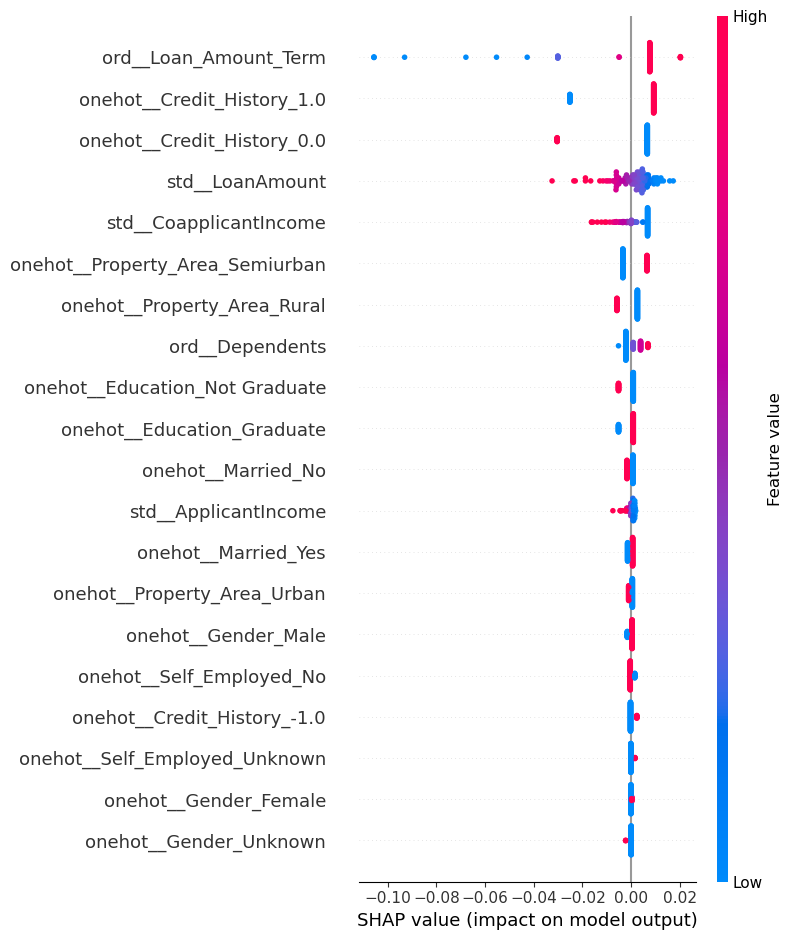

In [137]:
explainer = shap.LinearExplainer(best_model, X_train)
shap_values = explainer.shap_values(df_test)

# Create a summary plot
shap.summary_plot(shap_values, df_test)

In [ ]:
# shap.summary_plot(shap_values, X_test)

# Force plot for a single prediction

shap.force_plot(
    explainer.expected_value,
    shap_values[i].values,
    df_test.iloc[i],
    matplotlib=True,
    show=True,
    figsize=(20, 3),          # Increase figure width
    text_rotation=45,  
)

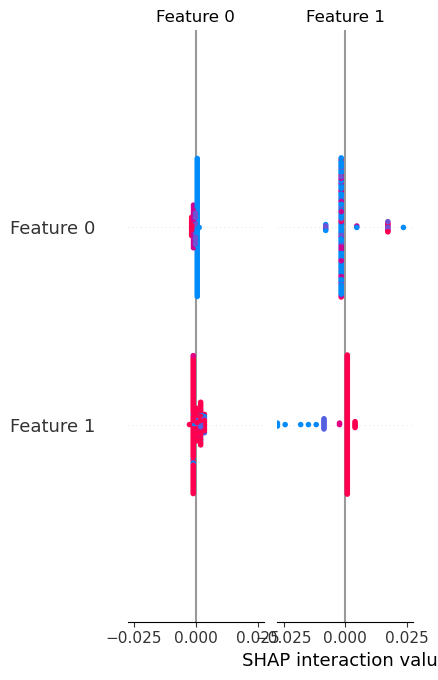

In [100]:
# Summary plot of feature importance
shap.summary_plot(shap_values, X_test)


# Force plot for a single prediction
# shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])

In [119]:
shap.force_plot(explainer.expected_value, shap_values[0].values, df_test.iloc[0])

TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).

In [117]:
df_test.iloc[0, :]


ord__Dependents                    0.000000
ord__Loan_Amount_Term              9.000000
onehot__Gender_Female              0.000000
onehot__Gender_Male                1.000000
onehot__Gender_Unknown             0.000000
onehot__Married_No                 0.000000
onehot__Married_Unknown            0.000000
onehot__Married_Yes                1.000000
onehot__Education_Graduate         0.000000
onehot__Education_Not Graduate     1.000000
onehot__Self_Employed_No           0.000000
onehot__Self_Employed_Unknown      0.000000
onehot__Self_Employed_Yes          1.000000
onehot__Credit_History_-1.0        0.000000
onehot__Credit_History_0.0         0.000000
onehot__Credit_History_1.0         1.000000
onehot__Property_Area_Rural        0.000000
onehot__Property_Area_Semiurban    0.000000
onehot__Property_Area_Urban        1.000000
std__ApplicantIncome              -0.108558
std__CoapplicantIncome            -0.597558
std__LoanAmount                   -0.101688
Name: 0, dtype: float64

In [112]:
shap_values[0]

.values =
array([[ 1.30014358e-03, -1.30014358e-03],
       [-8.18181997e-04,  8.18181997e-04],
       [ 2.06714825e-05, -2.06714825e-05],
       [-1.46730943e-04,  1.46730943e-04],
       [-1.11516123e-05,  1.11516123e-05],
       [-1.70665408e-04,  1.70665408e-04],
       [ 0.00000000e+00,  0.00000000e+00],
       [-1.54742300e-04,  1.54742300e-04],
       [ 1.21231741e-03, -1.21231741e-03],
       [ 1.21371121e-03, -1.21371121e-03],
       [-3.98106816e-04,  3.98106816e-04],
       [ 0.00000000e+00,  0.00000000e+00],
       [-2.86956332e-05,  2.86956332e-05],
       [ 0.00000000e+00,  0.00000000e+00],
       [-2.03737061e-03,  2.03737061e-03],
       [-1.89419632e-03,  1.89419632e-03],
       [-6.72668163e-04,  6.72668163e-04],
       [ 1.14027507e-03, -1.14027507e-03],
       [ 2.95042388e-04, -2.95042388e-04],
       [-9.40348414e-05,  9.40348414e-05],
       [-1.94131582e-03,  1.94131582e-03],
       [-4.72781058e-04,  4.72781058e-04]])

.base_values =
array([0.49809354, 0.501906